# **Welcome to FourthBrain's MLOps course!**
# In this assignment, we learn to access Google colab and we will start by building a simple ML model and deploying it to test prediction performance. 

## This assignment uses deployment using FastApi that we will review in detail in Week 3 and statistical ML model building that we will review in Week 1 of the course!


This assignment is based on the blog https://towardsdatascience.com/colabcode-deploying-machine-learning-models-from-google-colab-54e0d37a7b09

In [ ]:
!pip install colabcode

# Step 1: Load all Libraries

In [ ]:
!pip install fastapi

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
import pandas as pd
import pickle

# Step 2: Load the data from your local google drive.
Ensure the data is already downloaded and in your Google drive. The path has to be accurate for the data to be loaded. This exercise will help to correctly load data into colab.

In [ ]:
from google.colab import drive
# Mount the Google Drive at mount
mount='/content/gdrive'
print("Colab: mounting Google drive on ", mount)

drive.mount(mount)

# Switch to the directory on the Google Drive that you want to use
import os
drive_root = mount + "/My Drive/MLOps-Nov21/Week1_Kick-Off+Orientation"

# Create drive_root if it doesn't exist
create_drive_root = True
if create_drive_root:
  print("\nColab: making sure ", drive_root, " exists.")
  os.makedirs(drive_root, exist_ok=True)

# Change to the directory
print("\nColab: Changing directory to ", drive_root)
%cd $drive_root

%pwd

df = pd.read_csv('data_banknote_authentication.txt') 

In [6]:
df.head()

,Variance,Skewness,Kurtosis,Entropy,Class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


# Task 1: Getting familiar with the data
### The daata set is from the UCI Machine Learning Repository for Bank Note authentication https://archive.ics.uci.edu/ml/datasets/banknote+authentication

"Data were extracted from images that were taken from genuine and forged banknote-like specimens. For digitization, an industrial camera usually used for print inspection was used. The final images have 400x 400 pixels. Due to the object lens and distance to the investigated object gray-scale pictures with a resolution of about 660 dpi were gained. Wavelet Transform tool were used to extract features from images.


Attribute Information:

1. Cariance of Wavelet Transformed image (continuous)
2. Skewness of Wavelet Transformed image (continuous)
3. Kurtosis of Wavelet Transformed image (continuous)
4. Entropy of image (continuous)
5. class (fake: 0, real:1)"


#Write commands to 
###a. Check shape of the data
###b. Print data frame column names
###c. Isolating features for all samples
###d. Checking frequency of class 0 (fake notes) vs class 1 (real note)

In [7]:
### Write a command to Print the shape of df

print(df.shape)

(1372, 5)


In [8]:
#Write a command to print first few rows of the data

print(df.head(3))

   Variance  Skewness  Kurtosis  Entropy  Class
0    3.6216    8.6661   -2.8073 -0.44699      0
1    4.5459    8.1674   -2.4586 -1.46210      0
2    3.8660   -2.6383    1.9242  0.10645      0


In [9]:
# Print names of columns from the dataframe. The sample output is shown below.

print(df.columns)

Index(['Variance', 'Skewness', 'Kurtosis', 'Entropy', 'Class'], dtype='object')


In [10]:
# Print values of variance feature column.

print(df.Variance)


0       3.62160
1       4.54590
2       3.86600
3       3.45660
4       0.32924
         ...   
1367    0.40614
1368   -1.38870
1369   -3.75030
1370   -3.56370
1371   -2.54190
Name: Variance, Length: 1372, dtype: float64


In [11]:
df.var()

Variance     8.081299
Skewness    34.445710
Kurtosis    18.576359
Entropy      4.414256
Class        0.247112
dtype: float64

In [12]:
# From dataframe df, isolate the first 4 columsn as features (X) and last column as labels (y).
# Display the first few records of X and shape of X and y
X = df.iloc[:,0:4]
y = df.iloc[:,4]
# Add your code here
print(X.head())
print(X.shape)
print(y.shape)

   Variance  Skewness  Kurtosis  Entropy
0   3.62160    8.6661   -2.8073 -0.44699
1   4.54590    8.1674   -2.4586 -1.46210
2   3.86600   -2.6383    1.9242  0.10645
3   3.45660    9.5228   -4.0112 -3.59440
4   0.32924   -4.4552    4.5718 -0.98880
(1372, 4)
(1372,)


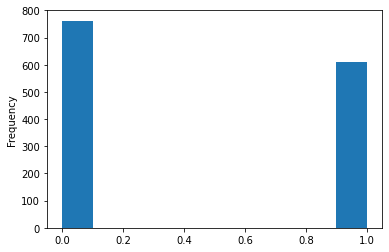

In [13]:
# Plot histogram of y
import matplotlib.pyplot as plt

# Add your code here.
y.plot(kind='hist')

# Task 2: Data Modeling
1.   Split the data as train and test
2.   Fit a Decision Tree model on training data
3.   Save the trained model as "model_tree.pkl"
4.  Report classification performance on test data



In [14]:
X_train, X_test, y_train, y_test = train_test_split(X,y,stratify=y)

tree = DecisionTreeClassifier(random_state=42)

tree.fit(X_train, y_train)

Pkl_Filename = "model_tree.pkl"  

with open(Pkl_Filename, 'wb') as file:  
    pickle.dump(tree, file)



###### This is the model for decision trees. We can change the model to any other model. Few machine learning models can be found at https://scikit-learn.org/stable/supervised_learning.html. 
###### Discuss the other models that can be used for training this data. 

Text(0.5, 1.0, '2-class Precision-Recall curve: AP=0.96')

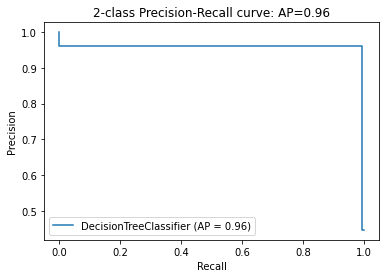

In [15]:
from sklearn.metrics import average_precision_score
from sklearn.metrics import plot_precision_recall_curve


disp = plot_precision_recall_curve(tree, X_test, y_test)
y_score=tree.predict(X_test)
average_precision = average_precision_score(y_test, y_score)
disp.ax_.set_title('2-class Precision-Recall curve: '
                   'AP={0:0.2f}'.format(average_precision))

###### Precision is the measure to evaluate how accurately the model has predicted. 
###### Recall is the measure to evaluate the amount of actual positives identified correctly. 
###### The precision-recall curve shows the tradeoff between precision and recall for different threshold.
###### Average precision score summarizes the precision-recall curve by computing average precision.
###### More information on precision-recall can be found at https://scikit-learn.org/stable/auto_examples/model_selection/plot_precision_recall.html 
###### More information on parameters of precision-recall curve for sklearn can be found at https://scikit-learn.org/stable/modules/generated/sklearn.metrics.plot_precision_recall_curve.html
###### More information on average precision score can be found at https://scikit-learn.org/stable/modules/generated/sklearn.metrics.average_precision_score.html

# Task 3: Generate a class for test data and Predict on Test instance

In [16]:
from pydantic import BaseModel

class Notes (BaseModel):
    Variance: float 
    Skewness: float 
    Kurtosis: float 
    Entropy: float 
    class Config:
        schema_extra = {
            "example": {
                "Variance": 0.838816, 
                "Skewness": 5.42950, 
                "Kurtosis": -6.69215,
                "Entropy": -4.60000,
               }
        }

###### Above class creates test data for all the features to test the model. The data is structured this way so that it can be feed into the API.
###### (optional) More information on usage of BaseModel can be found at https://pydantic-docs.helpmanual.io/usage/models/

In [17]:
#Next create an app with FastAPI to predict test cases
from fastapi import FastAPI
import pickle

app = FastAPI()

@app.on_event("startup")
def load_model():
    global model
    model = pickle.load(open("model_tree.pkl", "rb"))

@app.get('/')
def index():
    return {'message': 'This is the homepage of the API '}


@app.post('/predict')
def get_notes_category(data: Notes):
    received = data.dict()
    variance = received['Variance']
    skewness = received['Skewness']
    kurtosis = received['Kurtosis']
    entropy = received['Entropy']
    pred_name = model.predict([[variance, skewness, kurtosis, entropy]]).tolist()[0]
    return {'prediction': pred_name}

###### FastAPI is a web framework for building APIs with Python.
###### In the above code we have 2 API end points. 
###### The app starts by loading and initializing the model which is then used in other endpoints (in this case predict).
###### (optional) More information on FastAPI can be found at https://fastapi.tiangolo.com/  

In [18]:
# Launch the app at port# 1000
from colabcode import ColabCode
server = ColabCode(port=10000, code=False)

###### The above code initializes the server at the specified port.

In [ ]:
server.run_app(app=app)

INFO:     Started server process [425]
INFO:     Waiting for application startup.
INFO:     Application startup complete.
INFO:     Uvicorn running on http://127.0.0.1:10000 (Press CTRL+C to quit)


Public URL: NgrokTunnel: "https://7843-34-86-8-135.ngrok.io" -> "http://localhost:10000"
INFO:     47.155.230.124:0 - "GET / HTTP/1.1" 200 OK
INFO:     47.155.230.124:0 - "GET /favicon.ico HTTP/1.1" 404 Not Found
INFO:     47.155.230.124:0 - "GET /docs HTTP/1.1" 200 OK
INFO:     47.155.230.124:0 - "GET /openapi.json HTTP/1.1" 200 OK
INFO:     47.155.230.124:0 - "POST /predict HTTP/1.1" 422 Unprocessable Entity
INFO:     47.155.230.124:0 - "POST /predict HTTP/1.1" 200 OK


###### The above code runs the app and is ready to receive FastAPI object.

## Click on the "NgrokTunnel" Link above. Once the page opens, type "/docs" next to it, to open the FastAPI UI.
Execute the example above and report your prediction.

# Task 4: Inference
Next try another test case and report the prediction:

schema_extra = {
            "example": {
                "Variance": 0.00006, 
                "Skewness": 0.0001, 
                "Kurtosis": 0.69,
                "Entropy": 0.5,
               }
        }

# Summarize your findings for end-to-end deployment. Consider the following:
1. How would you find an optimal ML model?
2. How can you improve the model over time?

In [ ]:
schema_extra = {
            "example": {
                "Variance": 0.00006, 
                "Skewness": 0.0001, 
                "Kurtosis": 0.69,
                "Entropy": 0.5,
               }
        }

1. How would you find an optimal ML model?

There's several options but to list a few.

* Hyperparameter tuning for the current model
* Choose other models and test performance
* Create assemble of models and get some aggregated prediction
* Create new features
* Get more training data

2. How can you improve the model over time?


There's several options but to list a few.

* Create assemble of models and get some aggregated prediction
* Create new features
* Get more training data
* Retrain model
* Detect model and concept drift to avoid deterioration
* Have a feedback loop to generate new training data